# Projet : Trajectoire d’un bras de robot à 2 articulations.




## Objectifs du projet :
- Mettre en équation la trajectoire de l’outil d’un bras articulé à 2 degrés de libérté
- Résoudre un problème inverse
- Utiliser scipy.optimize pour résoudre un système d’équations non linéaires
- Programmer et comparer différentes méthodes pour résoudre le système d’équations non linéaires par minimisation du résidu du système 


# I.<u> ÉTUDE GÉNÉRALE:</u>

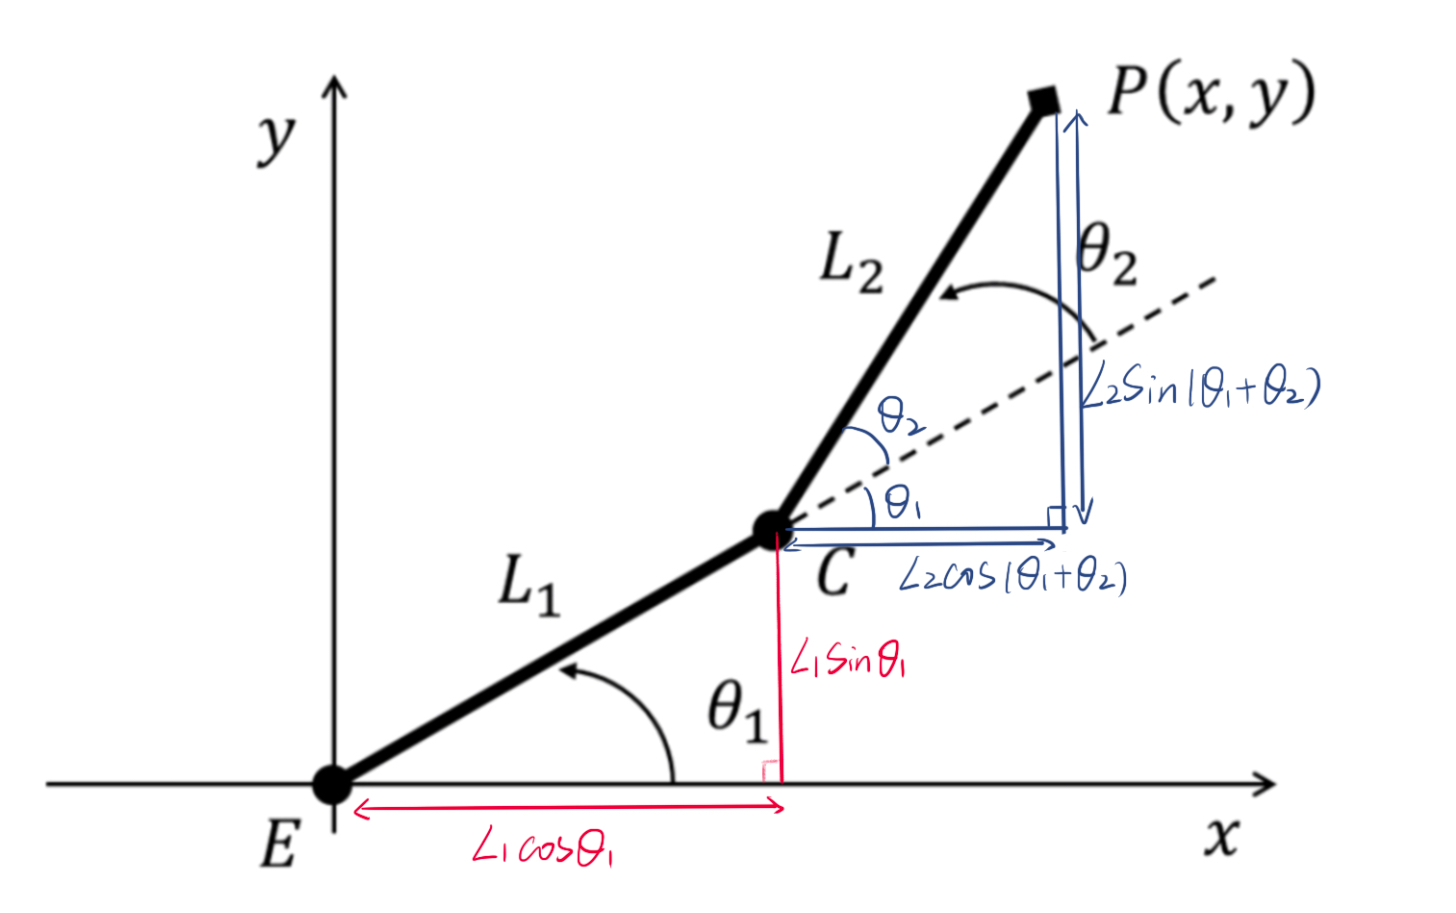




Les équations donné par les coordonnées $c$ :（$L_1cos(\theta_1)$ et $L_1sin(\theta_1)$)

Pour les coordonnées du point $P$, On a les 2 equations suivantes:  
$$ x = L_1cos(\theta_1)+L_2cos(\theta_1+\theta_2)\\ y = L_1sin(\theta_1)+L_2sin(\theta_1+\theta_2) $$ 

On defini: $$ X = \begin{pmatrix}x  \\ y  \end{pmatrix}$$

Avec:  $$\theta = \begin{pmatrix}\theta_1 \\ \theta_2  \end{pmatrix}$$


On aura un relation du type :  $R(\theta)=F(\theta)-X$

C'est-à-dire :$$R(\theta)=\begin{pmatrix}L_1cos(\theta_1)+L_2cos(\theta_1+\theta_2)-x  \\ L_1sin(\theta_1)+L_2sin(\theta_1+\theta_2)-y  \end{pmatrix}$$

Les angles $\theta_1$ et $\theta_2$ doivent être compris entre -180&deg; et 180&deg;, ce qui correspond à -3,14 et 3.14 en radians. 

Parmi les zones qui peuvent être atteintes par ce bras robotique (zones où des solutions existent) on a: 

- Premiers cas: L2 > L1  
Domaines possibles: Cercle de rayon L1+L2 avec l'origine comme centre  
Pour tous les points sauf sur le cercle de rayon L1+L2, il existe deux solutions.

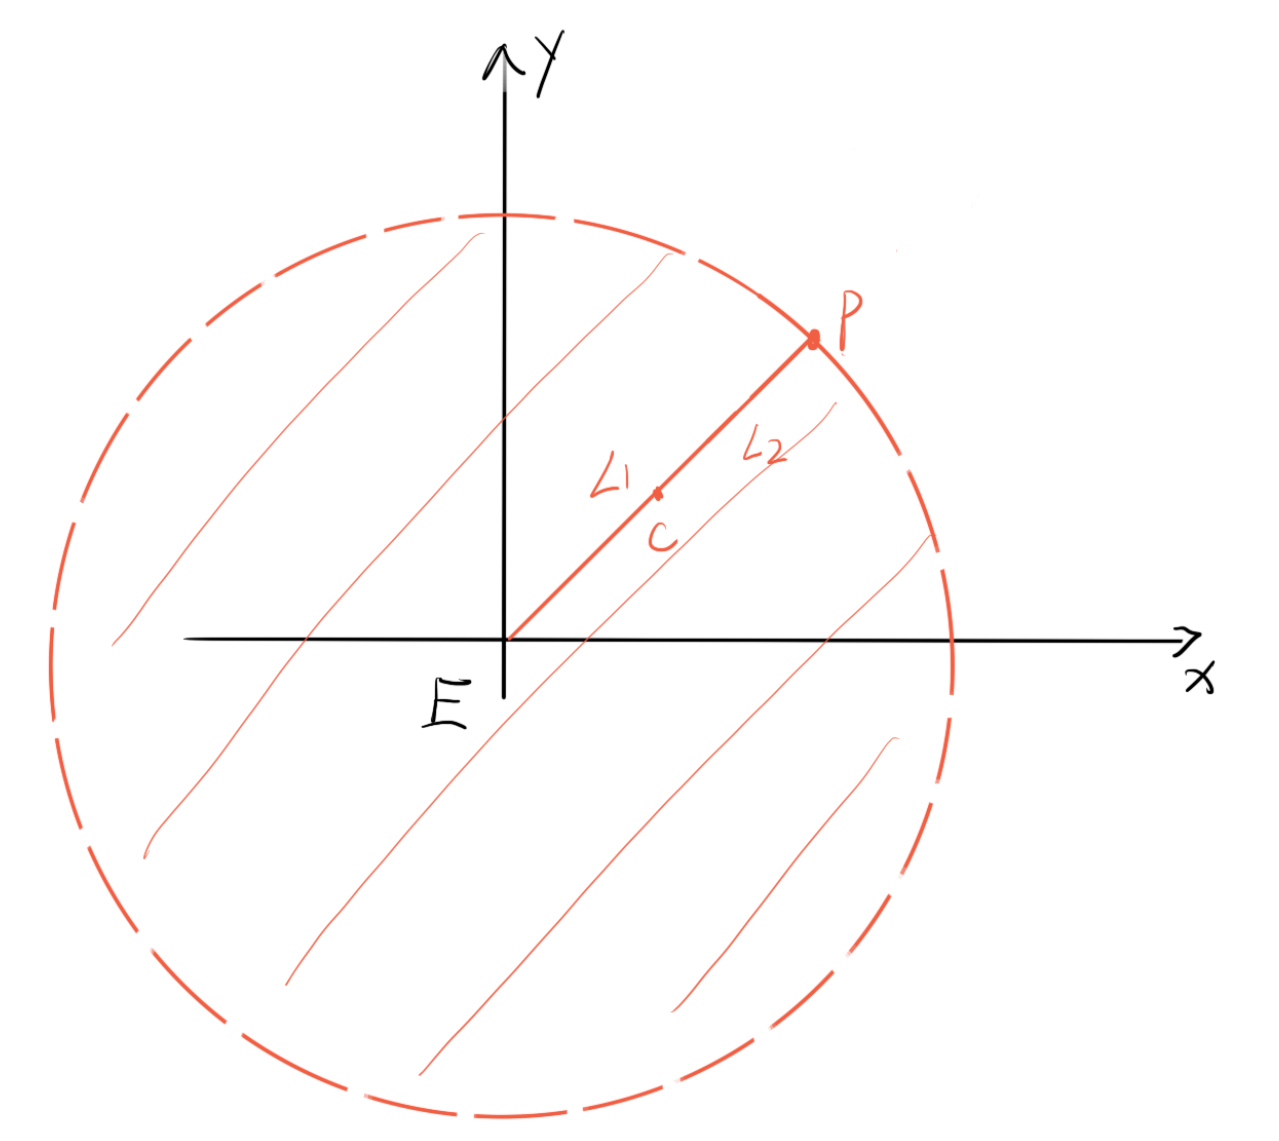

- Deuxième cas: L2 < L1  
Domaines possibles：un cercle de rayon L1+L2 avec l'origine comme centre, le cercle central de rayon L1-L2 ne peut être touché

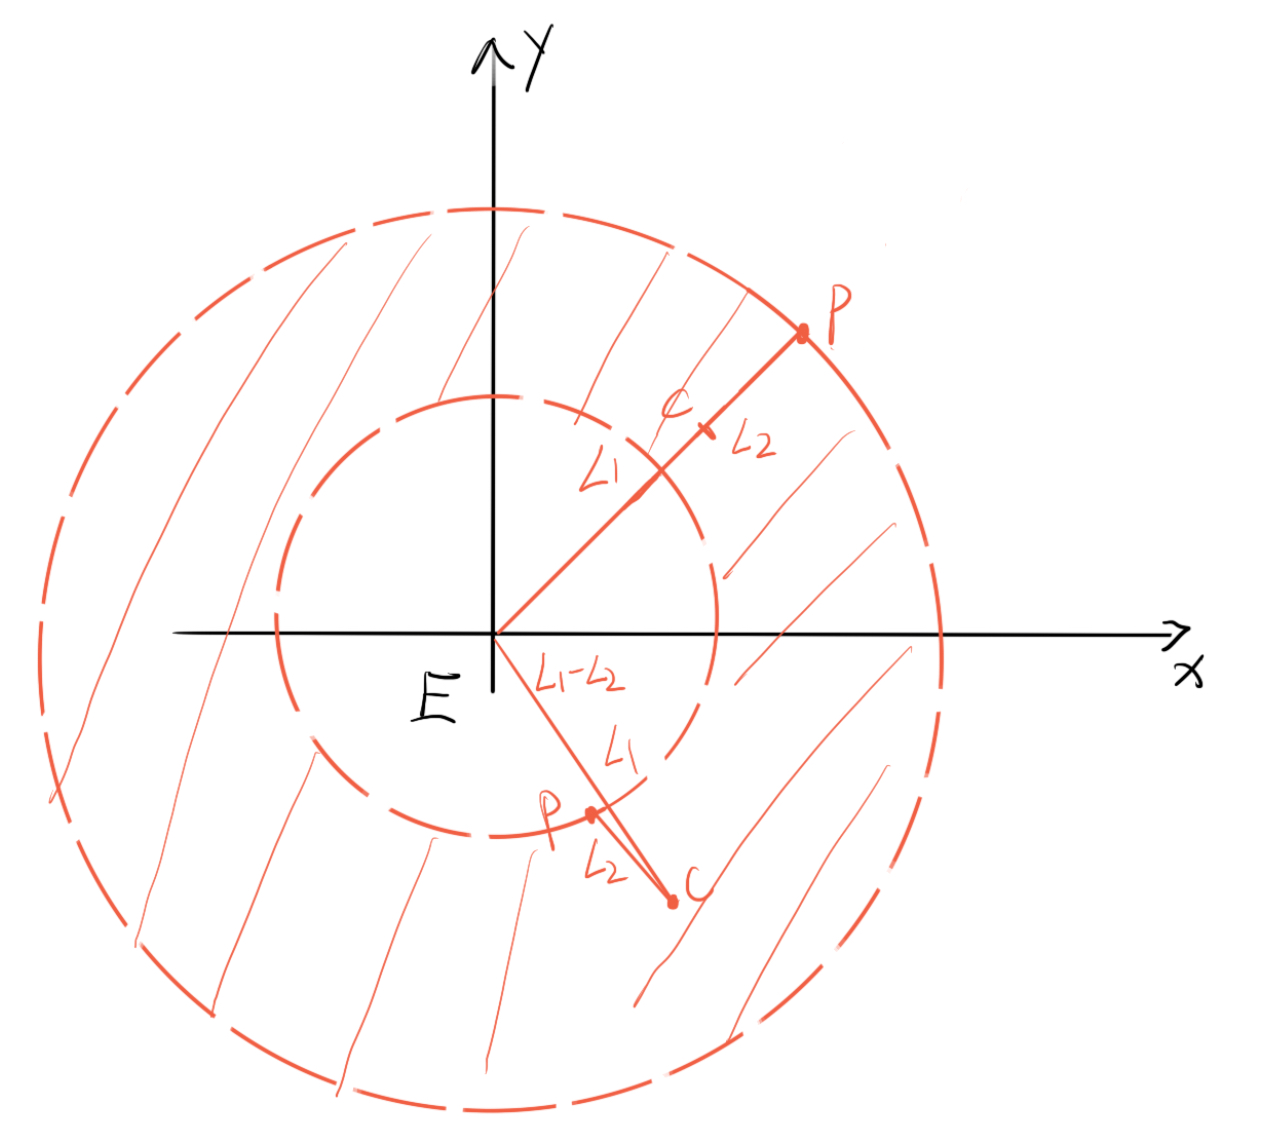

- Troisième cas: L2 = L1  
Domaines possibles: Cercle de rayon L1+L2 avec l'origine E comme centre.

Pour l'origine E, le bras du robot peut être atteint dans n'importe quelle attitude, il existe donc une infinité de solutions.
Pour toutes les autres régions atteignables, sauf sur la circonférence du cercle de rayon L1+L2, il existe deux solutions.  
Il existe deux solutions pour toutes les régions, sauf l'origine et la frontière.

# II.<u> EXISTENCE DE SOLUTION:</u>

L'image de surface 3D de la fonction est la suivante:

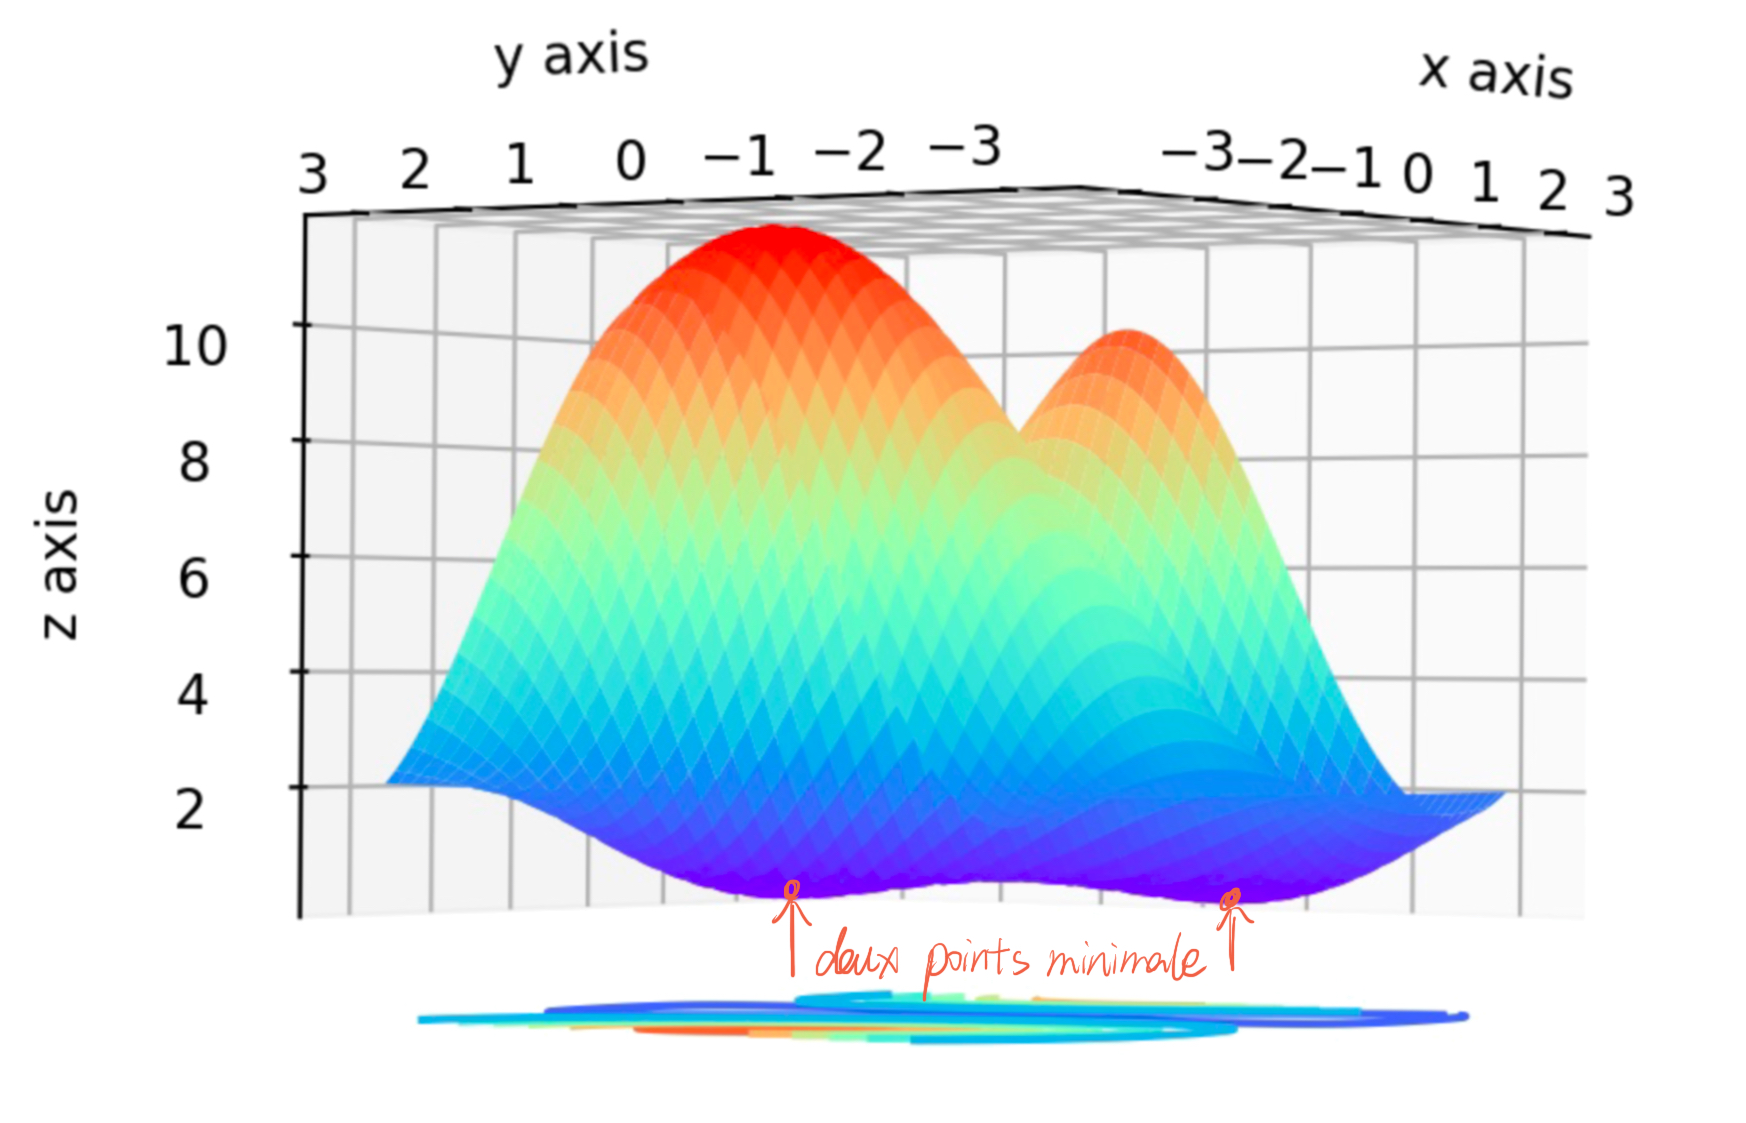

A partir de ce graphique, on peut voir que la fonction a 2 minimum ce qui veut dire que notre solution n'est pas unique et qu'il existe au moins deux solutions.

### Test des différents méthodes:

In [1]:
#Importation des bibliothèque
import numpy as np                 #Importation de la bibliothèque numpy 
import scipy.optimize              #Importation de la bibliothèque scipy.optimize
import matplotlib.pyplot as plt    #Importation de la bibliothèque matplotlib
from Fonctions import *            #Importation de mes fonction

Pour la partie suivante, nous utiliserons :  $x = 1{\,}  
 y = 1 {\,}
 L_1=1 {\,}
 L_2=1$ pour le test

In [2]:
#Déclaration des variables
L1 = 1
L2 = 1
x = 1
y = 1

# Paramètres de la fonction à annuler
param = [L1, L2, x, y]


### 1. Première méthode:

Première méthode : utiliser la fonction « root » de la bibliothèque scypy.optimize appliquées au résidu.

$R(\theta)=0$

$L_1cos(\theta_1)+L_2cos(\theta_1+\theta_2)-x=0$ 

$L_1sin(\theta_1)+L_2sin(\theta_1+\theta_2)-y=0$

Resolution de la méthode de root avec plusieur valeur initial:

In [3]:
# Résolution par la méthode root
sol_root1 = scipy.optimize.root(Residu,[0,0],param)
sol_root2 = scipy.optimize.root(Residu,[0,1.5],param)
sol_root3 = scipy.optimize.root(Residu,[2,2],param)
sol_root4 = scipy.optimize.root(Residu,[2.5,-2],param)

print(f"Points de prédiction = (0, 0)   {sol_root1.message} Résultats obtenus：[{sol_root1.x[0]}, {sol_root1.x[1]}]")
print(f"Points de prédiction = (0, 1.5) {sol_root2.message} Résultats obtenus：[{sol_root2.x[0]}, {sol_root2.x[1]}]")
print(f"Points de prédiction = (2, 2) {sol_root3.message} Résultats obtenus：[{sol_root3.x[0]}, {sol_root3.x[1]}]")
print(f"Points de prédiction = (2.5, -2) {sol_root4.message} Résultats obtenus：[{sol_root4.x[0]}, {sol_root4.x[1]}]")
# Print des solutions


Points de prédiction = (0, 0)   The solution converged. Résultats obtenus：[1.5707963267933236, -1.5707963267934593]
Points de prédiction = (0, 1.5) The solution converged. Résultats obtenus：[1.271541668074626e-10, 1.5707963266640046]
Points de prédiction = (2, 2) The solution converged. Résultats obtenus：[-4.712388980293799, 4.712388980276411]
Points de prédiction = (2.5, -2) The solution converged. Résultats obtenus：[1.570796326794926, -1.5707963267949623]


- Interpretation des résultats:  
    - Cette fonction est une fonction périodique car les fonctions trigonométriques sont périodiques. Par conséquent, cette solution est également l'une des valeurs minimales de la fonction 
    - Cette méthode permet de trouver les zéros d'une fonction, c-à-d les points où la fonction prend la valeur zéro. Lorsque la fonction  a plusieurs minimums, cette fonction trouve uniquement les zéros les plus proches de la valeur initiale choisie. Dans ce cas, il est recommandé de choisir une valeur initiale proche des zéros souhaités et d'exécuter plusieurs fois l'algorithme pour vérifier qu'il converge bien vers le zéro souhaité à chaque fois.

### 2. Deuxième méthode :

utiliser la fonction « minimize » de la bibliothèque scypy.optimize 

$||R(\theta)||^2 = (L_1cos(\theta_1)+L_2cos(\theta_1+\theta_2)-x)^2+(L_1sin(\theta_1)+L_2sin(\theta_1+\theta_2)-y)^2$

Resolution de la méthode de minimize avec plusieur valeur initial:

In [4]:
# Résolution par la méthode minimize
sol_minimiz1 = scipy.optimize.minimize(Residu_2,[0,0],param)
sol_minimiz2 = scipy.optimize.minimize(Residu_2,[1,-1],param)
sol_minimiz3 = scipy.optimize.minimize(Residu_2,[2, 2],param)
sol_minimiz4 = scipy.optimize.minimize(Residu_2,[2.5,-2],param)

# Print des solutions
print(f"Points de prédiction = (0, 0)   {sol_minimiz1.message} Résultats obtenus：[{sol_minimiz1.x[0]}, {sol_minimiz1.x[1]}]")
print(f"Points de prédiction = (-1, 1) {sol_minimiz2.message} Résultats obtenus：[{sol_minimiz2.x[0]}, {sol_minimiz2.x[1]}]")
print(f"Points de prédiction = (2, 2) {sol_minimiz3.message} Résultats obtenus：[{sol_minimiz3.x[0]}, {sol_minimiz3.x[1]}]")
print(f"Points de prédiction = (2.5, -2) {sol_minimiz4.message} Résultats obtenus：[{sol_minimiz4.x[0]}, {sol_minimiz4.x[1]}]")

Points de prédiction = (0, 0)   Optimization terminated successfully. Résultats obtenus：[-3.092102928695776e-08, 1.570795887634298]
Points de prédiction = (-1, 1) Optimization terminated successfully. Résultats obtenus：[1.5707939318941941, -1.5707935399120565]
Points de prédiction = (2, 2) Optimization terminated successfully. Résultats obtenus：[-1.1185766633798743e-07, 1.570796685142531]
Points de prédiction = (2.5, -2) Optimization terminated successfully. Résultats obtenus：[1.570796176067305, -1.5707963096827404]


Pour les régions sans solution, la valeur du carré du résidu sera supérieure à 0. 
Par exemple, si on choisit L1=1 L2=1 x=2 y=2.
De la discussion précédente, il est clair qu'il ne devrait pas y avoir de solution à cette coordonnée.
Les résultats que nous avons obtenus est：Carré du résidu = 0.6862915519821016


Pour les régions à solutions multiples, la solution de l'équation est liée au choix du point de prédiction.
Grâce à cette méthode, en changeant le point de départ, on peut obtenir deux solutions différentes de l'équation.
Par exemple,si on choisit L1=1 L2=1 x=1 y=1.Points de prédiction = (1, -1).
Résultats obtenus：[1.57095037 -1.57114645]
Carré du résidu: 6.21870579475825e-08

On peut voir que cette valeur est la même que celle obtenue par la première méthode.

Points de prédiction = (0, 0),Résultats obtenus：[-7.94698179e-05  1.57082587e+00] Carré du résidu:8.80811579229146e-09

- comment faut-il interpréter un minimum qui ne serait pas nul ?  
Si un minimum non nul est obtenu avec cette fonction, cela signifie que le système d'équations n'a pas pu être résolu de manière exacte. Cela est dû au fait que la fonction minimisée a plusieurs minimums locaux et la valeur initiale choisie est trés éloignée de tous les minimums alors l'algo converge vers le contour de la fonction. c'est pour ça il est recommandé de choisir une valeur initiale proche des minimums souhaités et d'exécuter plusieurs fois l'algorithme pour vérifier qu'il converge bien vers le bon minimum.

### 3. Troisième méthode:

#### Méthode de descente du gradient à pas fixe

On écrit un programme qui minimiser le carré de la norme du résidu en appliquant la méthode du gradient à pas fixe, avec un mécanisme qui garantit que la norme du résidu
diminue à chaque itération.

La méthode dite « à pas fixe » consiste à prendre une valeur de 𝛼 constante au cours des itérations. Le pas de
déplacement étant proportionnel au module du gradient, il diminue automatiquement au voisinage du minimum et
on peut espérer converger vers la solution, à condition de choisir une valeur de 𝛼 correcte. En effet, si 𝛼 est « trop
grand », on peut osciller autour du minimum sans jamais l’atteindre. A l’inverse, si 𝛼 est « trop petit », on est sûr de
converger vers le minimum, mais avec un nombre d’itérations inutilement grand. En pratique, à moins que l’on
dispose d’informations sur la dérivée seconde de la fonction, la détermination de 𝛼 est empirique (essais-erreurs).
Pour un problème donné, on teste différentes valeurs de 𝛼 jusqu’à trouver quelque chose de satisfaisant. 

#### 3.1 Dans un premier temps, on teste l’algorithme pour différente valeurs de alpha pour le meme point de départ 

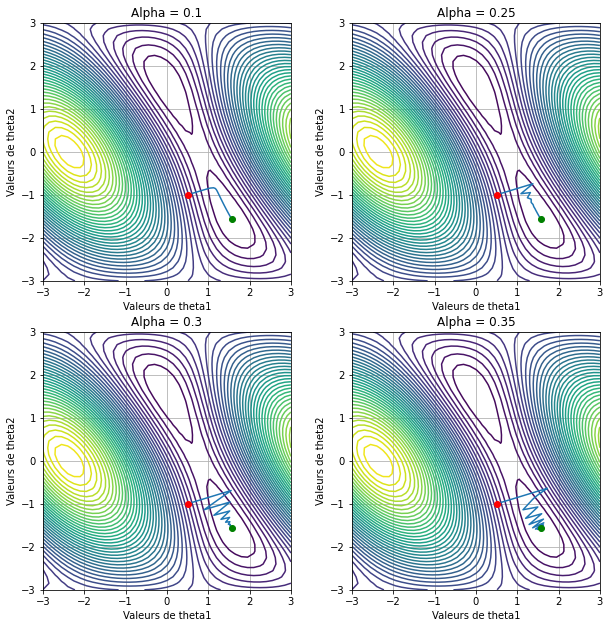

In [6]:
Liste_grad1,n_iter1,indicateur1 = grad_fixe(Residu_2,dResidu_2 , 0.5, -1, 0.1, 1e-5, 100, param)
Liste_grad2,n_iter2,indicateur2 = grad_fixe(Residu_2,dResidu_2 , 0.5, -1, 0.25, 1e-5, 100, param) 
Liste_grad3,n_iter3,indicateur3 = grad_fixe(Residu_2,dResidu_2 , 0.5, -1, 0.3, 1e-5, 100, param) 
Liste_grad4,n_iter4,indicateur4 = grad_fixe(Residu_2,dResidu_2 , 0.5, -1, 0.35, 1e-5, 100, param)

# Domaine de tracé
xmin, xmax, nx = -3, 3, 41
ymin, ymax, ny = -3, 3, 41


# Discrétisation du domaine de tracé
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)

Z = [[0]*len(y1d) for i in range(len(x1d))]
for i in range(len(x1d)):
    for j in range(len(y1d)):
        f = Residu_2([x1d[i], y1d[j]],param)
        Z[j][i] = f
Z1 = np.array(Z)

# Tracé des isovaleurs
nIso = 41

#Création de plusieurs subplots
fig, ax = plt.subplots(2, 2,figsize=(9,9))
#Espace entre les subplot
fig.tight_layout(pad=3.0)

#Subplot pour alpha = 0.1 
ax[0, 0].contour(x2d,y2d,Z1,nIso)
ax[0, 0].plot(Liste_grad1[0],Liste_grad1[1])
ax[0, 0].plot(Liste_grad1[0][0],Liste_grad1[1][0], c="red",marker="o")
ax[0, 0].plot(Liste_grad1[0][-1],Liste_grad1[1][-1],c="green",marker="o")
ax[0, 0].set_title('Alpha = 0.1')
ax[0, 0].set_xlabel('Valeurs de theta1')
ax[0, 0].set_ylabel('Valeurs de theta2')
ax[0, 0].grid()

#Subplot pour alpha = 0.25
ax[0, 1].contour(x2d,y2d,Z1,nIso)
ax[0, 1].plot(Liste_grad2[0],Liste_grad2[1])
ax[0, 1].plot(Liste_grad2[0][0],Liste_grad2[1][0], c="red",marker="o")
ax[0, 1].plot(Liste_grad2[0][-1],Liste_grad2[1][-1],c="green",marker="o")
ax[0, 1].set_title('Alpha = 0.25')
ax[0, 1].set_xlabel('Valeurs de theta1')
ax[0, 1].set_ylabel('Valeurs de theta2')
ax[0, 1].grid()

#Subplout pour alpha = 0.3
ax[1, 0].contour(x2d,y2d,Z1,nIso)
ax[1, 0].plot(Liste_grad3[0],Liste_grad3[1])
ax[1, 0].plot(Liste_grad3[0][0],Liste_grad3[1][0], c="red",marker="o")
ax[1, 0].plot(Liste_grad3[0][-1],Liste_grad3[1][-1],c="green",marker="o")
ax[1, 0].set_title('Alpha = 0.3')
ax[1, 0].set_xlabel('Valeurs de theta1')
ax[1, 0].set_ylabel('Valeurs de theta2')
ax[1, 0].grid()

#Subplot pour alpha = 0.35
ax[1, 1].contour(x2d,y2d,Z1,nIso)
ax[1, 1].plot(Liste_grad4[0],Liste_grad4[1])
ax[1, 1].plot(Liste_grad4[0][0],Liste_grad4[1][0], c="red",marker="o")
ax[1, 1].plot(Liste_grad4[0][-1],Liste_grad4[1][-1],c="green",marker="o")
ax[1, 1].set_title('Alpha = 0.35')
ax[1, 1].set_xlabel('Valeurs de theta1')
ax[1, 1].set_ylabel('Valeurs de theta2')
ax[1, 1].grid()

In [7]:
print (f"Avec Alpha = 0.1 le minimum est trouvé apres {n_iter1} iterations ")
print (f"Avec Alpha = 0.25 le minimum est trouvé apres {n_iter2} iterations ")
print (f"Avec Alpha = 0.3 le minimum est trouvé apres {n_iter3} iterations ")
print (f"Avec Alpha = 0.35 le minimum est trouvé apres {n_iter4} iterations ")

Avec Alpha = 0.1 le minimum est trouvé apres 67 iterations 
Avec Alpha = 0.25 le minimum est trouvé apres 28 iterations 
Avec Alpha = 0.3 le minimum est trouvé apres 22 iterations 
Avec Alpha = 0.35 le minimum est trouvé apres 43 iterations 


- Interpretation:   
Le choix de la longueur des pas est important. La longueur de pas détermine la longueur de chaque pas dans la direction négative du gradient pendant l'itération de descente du gradient. Si cette valeur est trop grande, le point de valeur extrême risque d'être manqué et la convergence ne sera pas possible. Si cette valeur est trop petite, la convergence sera lente.

#### 3.2 Ici, on teste l’algorithme pour différente point de départ avec le meme alpha  

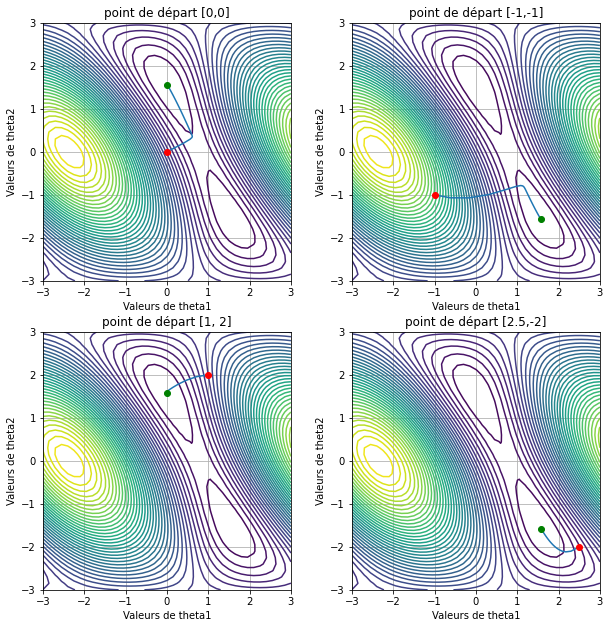

In [10]:
Liste_grad1, n_iter1, indicateur1 = grad_fixe(Residu_2,dResidu_2 , 0,0, 0.1, 1e-5, 100, param)
Liste_grad2, n_iter2, indicateur2 = grad_fixe(Residu_2,dResidu_2 , -1, -1, 0.1, 1e-5, 100, param) 
Liste_grad3, n_iter3, indicateur3 = grad_fixe(Residu_2,dResidu_2 , 1, 2, 0.1, 1e-5, 100, param) 
Liste_grad4, n_iter4, indicateur4 = grad_fixe(Residu_2,dResidu_2 , 2.5, -2, 0.1, 1e-5, 100, param)

# Domaine de tracé
xmin, xmax, nx = -3, 3, 41
ymin, ymax, ny = -3, 3, 41


# Discrétisation du domaine de tracé
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)

Z = [[0]*len(y1d) for i in range(len(x1d))]
for i in range(len(x1d)):
    for j in range(len(y1d)):
        f = Residu_2([x1d[i], y1d[j]],param)
        Z[j][i] = f
Z1 = np.array(Z)

# Tracé des isovaleurs
nIso = 41

#Création de plusieurs subplots
fig, ax = plt.subplots(2, 2,figsize=(9,9))
#Espace entre les subplot
fig.tight_layout(pad=3.0)

#Subplot pour point de départ [0,0]
ax[0, 0].contour(x2d,y2d,Z1,nIso)
ax[0, 0].plot(Liste_grad1[0],Liste_grad1[1])
ax[0, 0].plot(Liste_grad1[0][0],Liste_grad1[1][0], c="red",marker="o")
ax[0, 0].plot(Liste_grad1[0][-1],Liste_grad1[1][-1],c="green",marker="o")
ax[0, 0].set_title('point de départ [0,0]')
ax[0, 0].set_xlabel('Valeurs de theta1')
ax[0, 0].set_ylabel('Valeurs de theta2')
ax[0, 0].grid()

#Subplot point de départ [-1,-1]
ax[0, 1].contour(x2d,y2d,Z1,nIso)
ax[0, 1].plot(Liste_grad2[0],Liste_grad2[1])
ax[0, 1].plot(Liste_grad2[0][0],Liste_grad2[1][0], c="red",marker="o")
ax[0, 1].plot(Liste_grad2[0][-1],Liste_grad2[1][-1],c="green",marker="o")
ax[0, 1].set_title('point de départ [-1,-1]')
ax[0, 1].set_xlabel('Valeurs de theta1')
ax[0, 1].set_ylabel('Valeurs de theta2')
ax[0, 1].grid()

#Subplout point de départ [1,2]
ax[1, 0].contour(x2d,y2d,Z1,nIso)
ax[1, 0].plot(Liste_grad3[0],Liste_grad3[1])
ax[1, 0].plot(Liste_grad3[0][0],Liste_grad3[1][0], c="red",marker="o")
ax[1, 0].plot(Liste_grad3[0][-1],Liste_grad3[1][-1],c="green",marker="o")
ax[1, 0].set_title('point de départ [1, 2]')
ax[1, 0].set_xlabel('Valeurs de theta1')
ax[1, 0].set_ylabel('Valeurs de theta2')
ax[1, 0].grid()

#Subplot point de départ [2.5,-2]
ax[1, 1].contour(x2d,y2d,Z1,nIso)
ax[1, 1].plot(Liste_grad4[0],Liste_grad4[1])
ax[1, 1].plot(Liste_grad4[0][0],Liste_grad4[1][0], c="red",marker="o")
ax[1, 1].plot(Liste_grad4[0][-1],Liste_grad4[1][-1],c="green",marker="o")
ax[1, 1].set_title('point de départ [2.5,-2]')
ax[1, 1].set_xlabel('Valeurs de theta1')
ax[1, 1].set_ylabel('Valeurs de theta2')
ax[1, 1].grid()

- Conclusion:  
    - On remarque que en utilisant une valeur de 𝛼 correcte, Gradient converge vers un minimum même si la valeur initiale choisie est éloignée des minimum contrairement a la méthode de newton.



**Teste de la méthode du gradient pour un alpha grand**

In [11]:
Liste_graddown,n_iter,indicateurdown = grad_fixe_sansmeca(Residu_2,dResidu_2 , 0.5, -1, 0.5, 1e-5, 100, param)
print(indicateurdown)


Le programme ne converge pas
False


In [12]:
Liste_gradup,n_iter1,indicateurup = grad_fixe(Residu_2,dResidu_2 , 0.5, -1, 0.5, 1e-5, 100, param)
print(indicateurup)

True


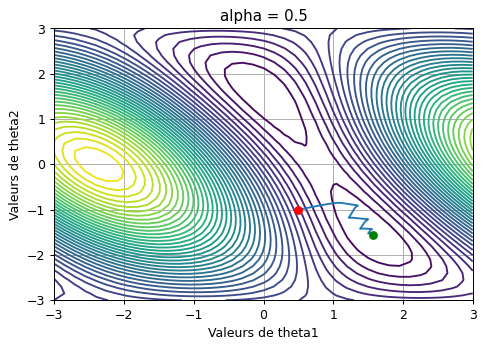

In [13]:
#plot alpha 0.5
plt.figure(figsize=(6, 4), dpi=90)
plt.contour(x2d,y2d,Z1,nIso)
plt.plot(Liste_gradup[0],Liste_gradup[1])
plt.plot(Liste_gradup[0][0],Liste_gradup[1][0], c="red",marker="o")
plt.plot(Liste_gradup[0][-1],Liste_gradup[1][-1],c="green",marker="o")
plt.title('alpha = 0.5')
plt.xlabel('Valeurs de theta1')
plt.ylabel('Valeurs de theta2')
plt.grid()

- Avec le mécanisme qui ajuste alpha, on a toujours  $𝐽(X_{n+1}) < 𝐽(X_{n})$ et cela fait que notre algorithme converge méme avec les plus grandes valeurs de alpha.

### 4. Quatrième méthode:

#### Méthode de Newton


On doit écrire un algorithme qui minimise le carré de la norme du résidu en appliquant la méthode de Newton.

 #### 4.1 on teste l’algorithme pour différente point de départ

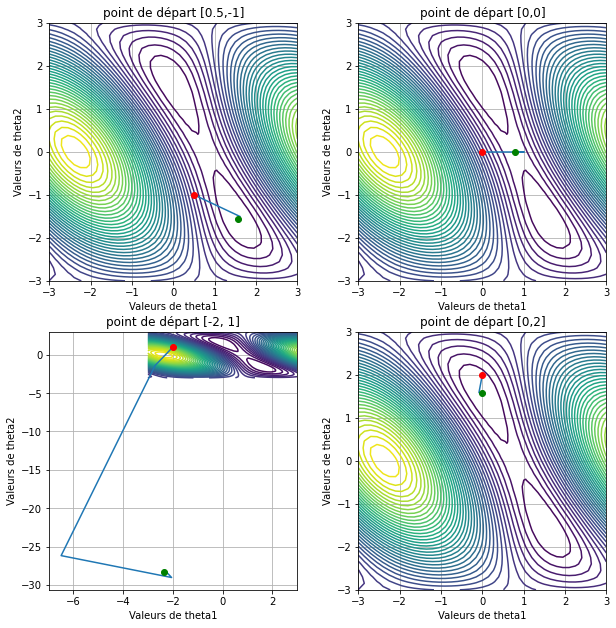

In [18]:
Liste_newton1, n_iter1, indicateur1 = Newton(Residu_2, dResidu_2, H, 0.5, -1, 1e-5, 100, param)
Liste_newton2, n_iter2, indicateur2 = Newton(Residu_2, dResidu_2, H, 0, 0, 1e-5, 100, param)
Liste_newton3, n_iter3, indicateur3 = Newton(Residu_2, dResidu_2, H, -2, 1, 1e-5, 100, param)
Liste_newton4, n_iter4, indicateur4 = Newton(Residu_2, dResidu_2, H, 0, 2, 1e-5, 100, param)

# Domaine de tracé
xmin, xmax, nx = -3, 3, 41
ymin, ymax, ny = -3, 3, 41


# Discrétisation du domaine de tracé
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)

Z = [[0]*len(y1d) for i in range(len(x1d))]
for i in range(len(x1d)):
    for j in range(len(y1d)):
        f = Residu_2([x1d[i], y1d[j]],param)
        Z[j][i] = f
Z1 = np.array(Z)

# Tracé des isovaleurs
nIso = 41

#Création de plusieurs subplots
fig, ax = plt.subplots(2, 2,figsize=(9,9))
#Espace entre les subplot
fig.tight_layout(pad=3.0)

#Subplot pour point de départ [0.5,-1]
ax[0, 0].contour(x2d,y2d,Z1,nIso)
ax[0, 0].plot(Liste_newton1[0],Liste_newton1[1])
ax[0, 0].plot(Liste_newton1[0][0],Liste_newton1[1][0], c="red",marker="o")
ax[0, 0].plot(Liste_newton1[0][-1],Liste_newton1[1][-1],c="green",marker="o")
ax[0, 0].set_title('point de départ [0.5,-1]')
ax[0, 0].set_xlabel('Valeurs de theta1')
ax[0, 0].set_ylabel('Valeurs de theta2')
ax[0, 0].grid()

#Subplot point de départ [0,0]
ax[0, 1].contour(x2d,y2d,Z1,nIso)
ax[0, 1].plot(Liste_newton2[0],Liste_newton2[1])
ax[0, 1].plot(Liste_newton2[0][0],Liste_newton2[1][0], c="red",marker="o")
ax[0, 1].plot(Liste_newton2[0][-1],Liste_newton2[1][-1],c="green",marker="o")
ax[0, 1].set_title('point de départ [0,0]')
ax[0, 1].set_xlabel('Valeurs de theta1')
ax[0, 1].set_ylabel('Valeurs de theta2')
ax[0, 1].grid()

#Subplout point de départ [-2,1]
ax[1, 0].contour(x2d,y2d,Z1,nIso)
ax[1, 0].plot(Liste_newton3[0],Liste_newton3[1])
ax[1, 0].plot(Liste_newton3[0][0],Liste_newton3[1][0], c="red",marker="o")
ax[1, 0].plot(Liste_newton3[0][-1],Liste_newton3[1][-1],c="green",marker="o")
ax[1, 0].set_title('point de départ [-2, 1]')
ax[1, 0].set_xlabel('Valeurs de theta1')
ax[1, 0].set_ylabel('Valeurs de theta2')
ax[1, 0].grid()

#Subplot point de départ [0,2]
ax[1, 1].contour(x2d,y2d,Z1,nIso)
ax[1, 1].plot(Liste_newton4[0],Liste_newton4[1])
ax[1, 1].plot(Liste_newton4[0][0],Liste_newton4[1][0], c="red",marker="o")
ax[1, 1].plot(Liste_newton4[0][-1],Liste_newton4[1][-1],c="green",marker="o")
ax[1, 1].set_title('point de départ [0,2]')
ax[1, 1].set_xlabel('Valeurs de theta1')
ax[1, 1].set_ylabel('Valeurs de theta2')
ax[1, 1].grid()

In [19]:
print(f"Pour le point de départ [0.5,-1] notre algorithme à convergé : {indicateur1}")
print(f"Pour le point de départ [0,0] notre algorithme à convergé : {indicateur2}")
print(f"Pour le point de départ [-2,1] notre algorithme à convergé : {indicateur3}")
print(f"Pour le point de départ [0,2] notre algorithme à convergé : {indicateur4}")

Pour le point de départ [0.5,-1] notre algorithme à convergé : True
Pour le point de départ [0,0] notre algorithme à convergé : True
Pour le point de départ [-2,1] notre algorithme à convergé : True
Pour le point de départ [0,2] notre algorithme à convergé : True


In [20]:
print(f"Pour le point de départ [0.5,-1] le minimum est trouvé apres {n_iter1} iterations ")
print(f"Pour le point de départ [0,0] le minimum est trouvé apres {n_iter2} iterations ")
print(f"Pour le point de départ [-2,1] le minimum est trouvé apres {n_iter3} iterations ")
print(f"Pour le point de départ [0,2] le minimum est trouvé apres {n_iter4} iterations ")

Pour le point de départ [0.5,-1] le minimum est trouvé apres 4 iterations 
Pour le point de départ [0,0] le minimum est trouvé apres 4 iterations 
Pour le point de départ [-2,1] le minimum est trouvé apres 7 iterations 
Pour le point de départ [0,2] le minimum est trouvé apres 5 iterations 


In [21]:
# Print des solutions
print(f"Pour le point de départ [0.5,-1]: Theta1 = {Liste_newton1[0][-1]}   Theta2 = {Liste_newton1[1][-1]}")
print(f"Pour le point de départ [0,0]   : Theta1 = {Liste_newton2[0][-1]}   Theta2 = {Liste_newton2[1][-1]}")
print(f"Pour le point de départ [-2,1]  : Theta1 = {Liste_newton3[0][-1]}   Theta2 = {Liste_newton3[1][-1]}")
print(f"Pour le point de départ [0,2]   : Theta1 = {Liste_newton4[0][-1]} Theta2 = {Liste_newton4[1][-1]}")

Pour le point de départ [0.5,-1]: Theta1 = 1.5707963267944147   Theta2 = -1.5707963267910894
Pour le point de départ [0,0]   : Theta1 = 0.7853981633974483   Theta2 = 0.0
Pour le point de départ [-2,1]  : Theta1 = -2.356194490192345   Theta2 = -28.274333882308138
Pour le point de départ [0,2]   : Theta1 = 9.85805582299831e-17 Theta2 = 1.5707963267948966


Conclusion:  
- Cette méthode est trés puissante et plus rapide comparé au gradient a pas fixe.  
- Vu que notre fonction n’est pas convexe, Newton peut diverger lorsque la valeur initiale choisie est éloignée du minimum.

**En vue d'améliorer la performance de notre algorithme On peut combiner entre la méthode de gradient à pas fixe avec la méthode de Newton pour tirer parti des avantages de chacune de ces méthodes.**

### 5. Méthode Bonus:

#### Méthode de descente du gradient à pas optimal:

nous allons chercher le point suivant dans la direction opposée du gradient. 
Par conséquent,$\overrightarrow {X_{n+1}X_n}$ et $\overrightarrow {\nabla J}$ sont colinéaires. 

Donc，le problème initial se traduit: 

minimiser $J(X)$,sous contrainte
$\overrightarrow {X_{n+1}X_n} \times \overrightarrow {\nabla J} = 0$


$J(\theta)=\begin{pmatrix}L_1cos(\theta_1)+L_2cos(\theta_1+\theta_2)-x  \\ L_1sin(\theta_1)+L_2sin(\theta_1+\theta_2)-y  \end{pmatrix}$  

$\theta_1 = a$ 

$\theta_2 = b$ 

$da = 2*L1*x*sin(a) - 2*L1*y*cos(a) + 2*L2*x*sin(a + b) - 2*L2*y*cos(a + b)$ 

$db = -2*L1*L2*sin(b) + 2*L2*x*sin(a + b) - 2*L2*y*cos(a + b)$


$C(X_{n+1})=\begin{pmatrix}x_{n+1,0}-x_{n,0}\\x_{n+1,1}-x_{n,1}\end{pmatrix} \times \begin{pmatrix}J_{x,1}\\J_{x,2}\end{pmatrix}=J_{x,2}(X_{n+1,0}-X_{n,0})-J_{x,1}(X_{n+1,1}-X_{n,1})$  
Les variables de cette équation: $X_{n+1,0}$ et $X_{n+1,1}$  
$\nabla C(x) = \begin{pmatrix}J_{x,2}\\-J_{x,1}\end{pmatrix}$   


Selon la méthode du multiplicateur de Lagrange, nous obtenons： 
$\nabla J(x)+\lambda \nabla C(x) =0$ 

$C(x)= 0$  
Ainsi, le système d'équations peut être obtenu：

                     
$J_{x,1}+\lambda J_{x,2}=0$

$J_{x,2}-\lambda J_{x,1}=0$

$(x_{n+1,1}-x_{n,0})J_{x,2}-(x_{n+1,2}-x_{n,1}) J_{x,1}=0$

In [30]:
alist = []
blist = []
zlist = []

alist.append(0)
blist.append(0)
i_max = 10
i = 0
def f(x):
    L1 = 1
    L2 = 1
    x1 = 1
    y = 1
    da = 2*L1*x1*np.sin(x[0]) - 2*L1*y*np.cos(x[0]) + 2*L2*x1*np.sin(x[0] + x[1]) - 2*L2*y*np.cos(x[0] + x[1])
    db = -2*L1*L2*np.sin(x[1]) + 2*L2*x1*np.sin(x[0] + x[1]) - 2*L2*y*np.cos(x[0] + x[1])

    return np.array([da+x[2]*db,db-x[2]*da,(alist[i]-x[2])*db-(blist[i]-x[1])*da])


while i < i_max:
    sol_fsolve = scipy.optimize.fsolve(f, [1.5, -1.5, 0])
    alist.append(sol_fsolve[0])
    blist.append(sol_fsolve[1])
    i += 1

print(f"Theta1 = {alist[-1]} \nTheta2 = {blist[-1]}")

Theta1 = 1.5707963267944536 
Theta2 = -1.570796326794183


# III. <u>Trajectoire et position du bras articulé: </u> 

On trace la Trajectoire et position du bras articulé avec chaque méthode 

In [26]:
# Définir la trajectoire du bras 
x_,y_ = Trajectoire([0.75,0.5],[2,2])

# La postition du point P
tabx = x_
taby = y_

# Ici on prend un choix L1 = 2 et L2 = 2
L1 = 2
L2 = 2

tab_root = [] # theta trouvé avec root
tab_minimize = [] # theta trouvé avec minimize
tab_gradnewton = [] # theta trouvé avec la collab entre gradient et newton 


for i in range(len(tabx)):

    param = [L1, L2, tabx[i], taby[i]]

    # Résolution avec la méthode de Roor
    tab_root.append(scipy.optimize.root(Residu,[2.5,-2],param).x)

    # Résolution avec la méthode de minimize 
    tab_minimize.append(scipy.optimize.minimize(Residu_2,[2.5,-2],param).x)

    # Résolution avec la combine Newton et gradient 
    # Apres plusieur teste il s'est avéré que il vaut mieux utilisé une combine entre la méthode de newton et le gradient 
    Liste_grad, n_iter,indicateur = grad_fixe(Residu_2, dResidu_2, 2.5, -2, 0.2, 1e-5, 1000, param)
    liste_newton, n_iter1,indicateur1 = Newton(Residu_2, dResidu_2, H, Liste_grad[0][-1],Liste_grad[1][-1], 1e-5, 100, param)
    tab_gradnewton.append([liste_newton[0][-1], liste_newton[1][-1]])

# Pour facilité la manipulation des tableaux on les mets en array
tab_root = np.array(tab_root)
tab_minimize = np.array(tab_minimize)
tab_gradnewton = np.array(tab_gradnewton)

## Tracé la trajectoire avec la méthode root

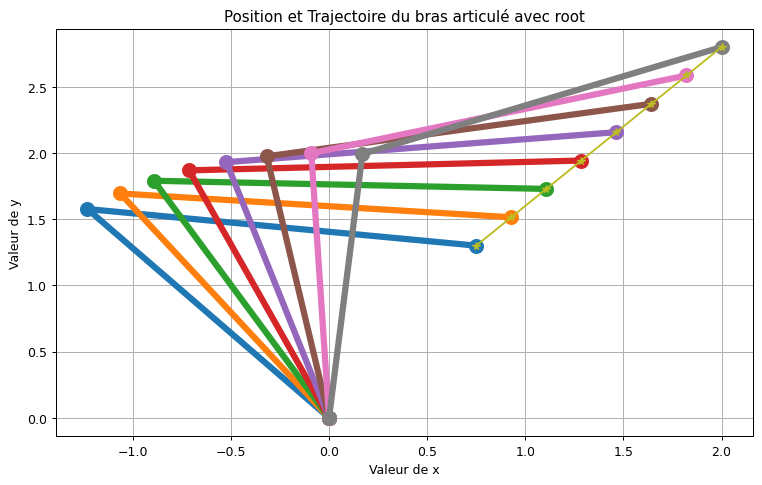

In [27]:
x , y = position(tab_root[:,0],tab_root[:,1])

# Tracé de la trajectoire avec root
plt.figure(figsize=(10, 6), dpi=90)
for i in range(len(x)):
    plt.plot(x[i], y[i], 'o-', lw=5, mew=6)
plt.plot(x[:,2], y[:,2] , '-*' )
plt.title('Position et Trajectoire du bras articulé avec root')
plt.xlabel("Valeur de x")
plt.ylabel("Valeur de y")
plt.grid()


## Tracé la trajectoir avec la méthode minimize

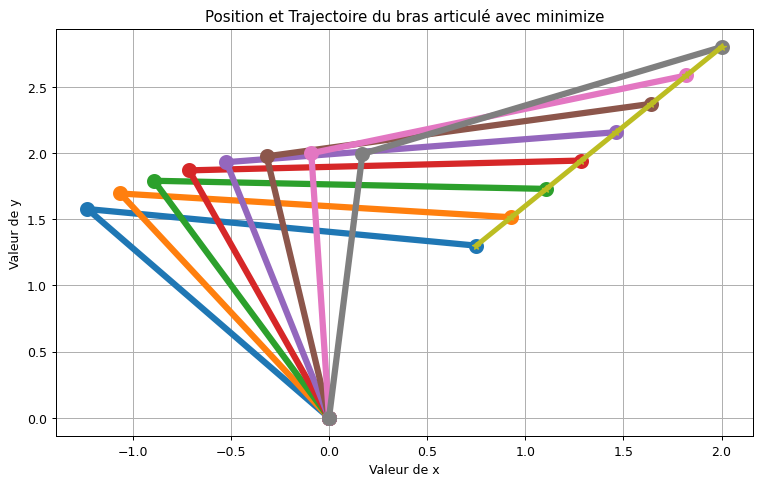

In [28]:
x , y = position(tab_minimize[:,0],tab_minimize[:,1])

#Tracé de la trajectoire avec minimize
plt.figure(figsize=(10, 6), dpi=90)
for i in range(len(x)):
    plt.plot(x[i], y[i], 'o-', lw=5, mew=6)
plt.plot(x[:,2], y[:,2] , '-*', lw = 4)
plt.title('Position et Trajectoire du bras articulé avec minimize')
plt.xlabel("Valeur de x")
plt.ylabel("Valeur de y")
plt.grid()

## Tracé la trajectoir avec la méthode du gradient a pas fixe


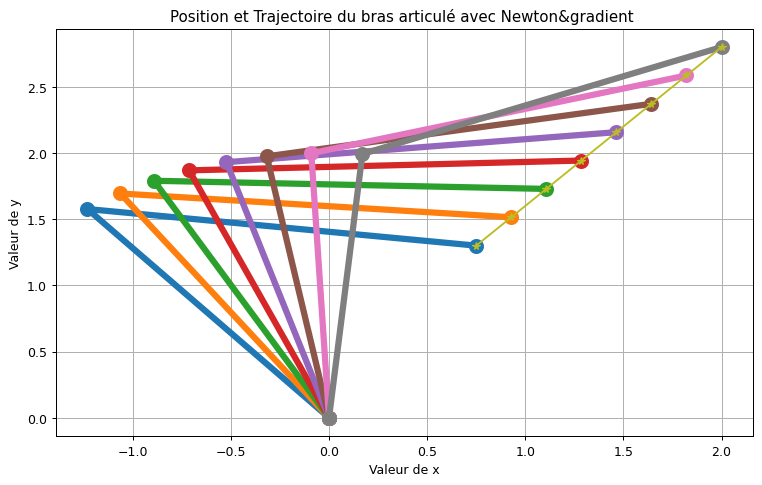

In [29]:
x , y = position(tab_gradnewton[:,0],tab_gradnewton[:,1])

# #Tracé de la trajectoire avec minimize
plt.figure(figsize=(10, 6), dpi=90)
for i in range(len(x)):
    plt.plot(x[i], y[i], 'o-', lw=5, mew=6)
plt.plot(x[:,2], y[:,2] , '-*' )
plt.title('Position et Trajectoire du bras articulé avec Newton&gradient ')
plt.xlabel("Valeur de x")
plt.ylabel("Valeur de y")
plt.grid()

**Nous avons utilisé différentes méthodes pour trouver les positions et trajectoires d'un bras articulé, ces méthodes ont toutes donné les mêmes postions et trajectoires. Cela veut dire que nos algorithmes ont bien fonctionné et ont produit des résultats cohérents. Cela peut être une indication de la fiabilité et de la validité de nos algorithmes.**

# IV. <u> Conclusion:</u> 

Sur ce projet, nous avons travaillé sur un problème dit "inverse" en utilisant des méthodes numériques telles que la bibliothèque scipy.optimize, la méthode du gradient à pas fixe et à pas optimale, et la méthode de Newton. Ces méthodes vous ont permis de résoudre des problèmes inverse en partant des sorties désirées pour arriver aux entrées nécessaires.

En travaillant sur ce projet, On a eu également l'occasion de comparer ces différentes méthodes et de voir les différences entre elles. Nous sommes maintenant en mesure de résoudre des problèmes inverse de manière efficace.

                                                                     Fait par: HAMDI Massyl Yanis | Wang Jing |  Mokhbi Lyes